## BIOS512 Final Project: An Exploratory Analysis of Prescribing Practices and Geographic Location and their Roles in the US Opioid Epidemic

### By Jessica Kim 

#### According to the CDC, opioids can be defined as a class of drugs to reduce pain. In the late 90's, Americans began to experience chronic pain, and physicians were unsure how to treat it. Pharmaceutical companies downplayed the addictive properties of opioids to physicians while overselling its benefits for pain treatment in order to make a large profit. As a result, opioid prescriptions skyrocketed throughout the 2000’s, and overdoses and deaths began to escalate in parallel, with 16,651 opioid-related deaths in 2010 alone. In the 2010's, individuals began turning to illegal opioids with similar (or higher) potency, primarily heroin and illegally manufactured fentanyl. As a result, the opioid epidemic has become a major public health issue, with opioid overdoses being the number one cause of injury-related deaths in the US.

#### This project examines two interrelated datasets, with prescriber-info.csv containing summaries of records for 250 common opioid and non-opioid drug prescriptions written by 25,000 licensed medical providers in the United States for citizens covered under Class D Medicare in the year 2014, and overdoses.csv containing information on fatal opioid overdoses by state. A cursory glance at the data shows higher numbers of fatal overdoses and prescriptions in more populated states, but examining these numbers by state population size reveals high rates of both overdose and opioid prescription in the Midwest, Southeast, and Northeast regions, which can be partially explained by the fact these are predominantly rural areas that have manual labor intensive industries that cause chronic pain and occupational injury. 

In [1]:
library('tidyverse')
library('readr')
library('patchwork')
library('dplyr')
library('reshape2')

── Attaching packages ─────────────────────────────────────── tidyverse 1.2.1 ──
✔ ggplot2 3.2.1     ✔ purrr   0.3.3
✔ tibble  2.1.3     ✔ dplyr   0.8.3
✔ tidyr   1.0.0     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.4.0
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Attaching package: ‘reshape2’

The following object is masked from ‘package:tidyr’:

    smiths



In [2]:
options(stringsAsFactors = FALSE)

In [3]:
overdose_df = read_csv('overdoses.csv')
prescriber_df = read_csv('prescriber-info.csv')

Parsed with column specification:
cols(
  State = col_character(),
  Population = col_number(),
  Deaths = col_number(),
  Abbrev = col_character()
)
Parsed with column specification:
cols(
  .default = col_double(),
  Gender = col_character(),
  State = col_character(),
  Credentials = col_character(),
  Specialty = col_character()
)
See spec(...) for full column specifications.


In [4]:
overdose_df %>% print

# A tibble: 50 x 4
   State       Population Deaths Abbrev
   <chr>            <dbl>  <dbl> <chr> 
 1 Alabama        4833722    723 AL    
 2 Alaska          735132    124 AK    
 3 Arizona        6626624   1211 AZ    
 4 Arkansas       2959373    356 AR    
 5 California    38332521   4521 CA    
 6 Colorado       5268367    899 CO    
 7 Connecticut    3596080    623 CT    
 8 Delaware        925749    189 DE    
 9 Florida       19552860   2634 FL    
10 Georgia        9992167   1206 GA    
# … with 40 more rows


In [5]:
population_ranking = overdose_df %>% 
    select(State, Population, Deaths) %>%
    arrange(desc(Population))

population_ranking %>% head(n = 10)

State,Population,Deaths
<chr>,<dbl>,<dbl>
California,38332521,4521
Texas,26448193,2601
New York,19651127,2300
Florida,19552860,2634
Illinois,12882135,1705
Pennsylvania,12773801,2732
Ohio,11570808,2744
Georgia,9992167,1206
Michigan,9895622,1762


In [6]:
overdose_ranking = overdose_df %>%
    select(State, Population, Deaths) %>%
    arrange(desc(Deaths))

overdose_ranking %>% head(n = 10)

State,Population,Deaths
<chr>,<dbl>,<dbl>
California,38332521,4521
Ohio,11570808,2744
Pennsylvania,12773801,2732
Florida,19552860,2634
Texas,26448193,2601
New York,19651127,2300
Michigan,9895622,1762
Illinois,12882135,1705
North Carolina,9848060,1358


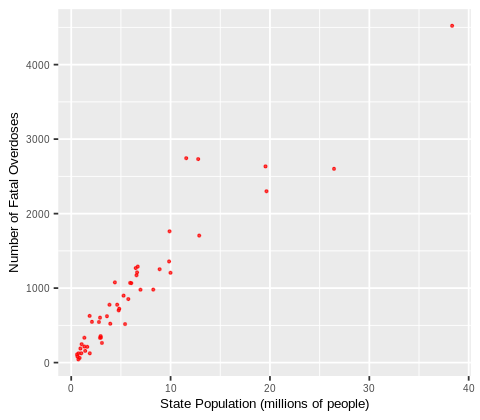

In [40]:
options(repr.plot.width = 4, repr.plot.height = 3.5)

p = ggplot(overdose_df, aes(x = (Population/1000000), y = Deaths)) + geom_point(size = 0.5, alpha = 0.7, color = "red")

p = p + theme(axis.text.x = element_text(size = 6),
              axis.text.y = element_text(size = 6),
              strip.text.x = element_blank(),
              axis.title.x = element_text(size = 8),
              axis.title.y = element_text(size = 8),
              strip.background = element_blank())

p = p + labs(y = "Number of Fatal Overdoses",
             x = "State Population (millions of people)")

p

### This graph clearly demonstrates a positive linear relationship between state population and number of fatal drug overdoses, which is fairly intuitive.  

In [8]:
prescriber_df1 = prescriber_df %>% filter(NPI, !(State %in% c("AE", "ZZ", "GU", "DC", "PR", "VI")))
                        
prescriber_df1 %>% head

NPI,Gender,State,Credentials,Specialty,ABILIFY,ACETAMINOPHEN.CODEINE,ACYCLOVIR,ADVAIR.DISKUS,AGGRENOX,⋯,VERAPAMIL.ER,VESICARE,VOLTAREN,VYTORIN,WARFARIN.SODIUM,XARELTO,ZETIA,ZIPRASIDONE.HCL,ZOLPIDEM.TARTRATE,Opioid.Prescriber
<dbl>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1710982582,M,TX,DDS,Dentist,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,1
1245278100,F,AL,MD,General Surgery,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,35,1
1427182161,F,NY,M.D.,General Practice,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,25,0
1669567541,M,AZ,MD,Internal Medicine,0,43,0,0,0,⋯,0,0,0,0,0,0,0,0,0,1
1679650949,M,NV,M.D.,Hematology/Oncology,0,0,0,0,0,⋯,0,0,0,0,17,28,0,0,0,1
1548580897,M,PA,DO,General Surgery,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,1


### This data frame shows the unique identification number of 25,000 licensed medical providers along with counts for the number of prescriptions he/she wrote for 250 types of common opioid and non-opioid drugs in 2014 alone. The very last column contains a Boolean operator for whether or not the provider had prescribed over 10 opioids, with 1 for yes and 0 for no.  

In [ ]:
prescriber_df2 = prescriber_df1 %>% 
    filter(Opioid.Prescriber == 1) %>% 
    group_by(State) %>% 
    summarize(n = n())

In [10]:
prescriber_df_filtered = prescriber_df2 %>%
    rename(Abbrev = State, PrescriptionCount = n) 

prescriber_df_filtered %>% head

Abbrev,PrescriptionCount
<chr>,<int>
AK,27
AL,244
AR,159
AZ,331
CA,1462
CO,256


In [11]:
df = merge(x = overdose_df, y = prescriber_df_filtered, by = "Abbrev", all = TRUE)

df %>% head

Abbrev,State,Population,Deaths,PrescriptionCount
<chr>,<chr>,<dbl>,<dbl>,<int>
AK,Alaska,735132,124,27
AL,Alabama,4833722,723,244
AR,Arkansas,2959373,356,159
AZ,Arizona,6626624,1211,331
CA,California,38332521,4521,1462
CO,Colorado,5268367,899,256


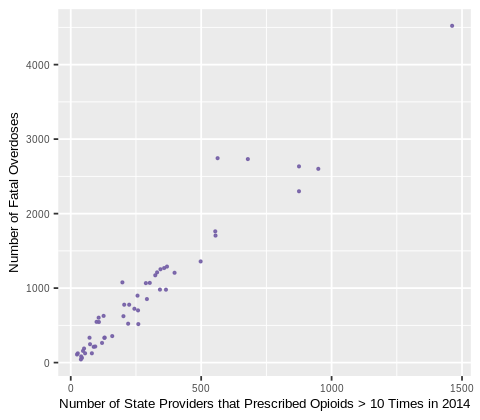

In [39]:
options(repr.plot.width = 4, repr.plot.height = 3.5) 

q = ggplot(df, aes(x = PrescriptionCount, y = Deaths)) + geom_point(size= 0.5, alpha = 0.9, color = "#7560A6")

q = q + theme(axis.text.x = element_text(size = 6),
              axis.text.y = element_text(size = 6),
              strip.text.x = element_blank(),
              axis.title.x = element_text(size = 8),
              axis.title.y = element_text(size = 8),
              strip.background = element_blank())

q = q + labs(y = "Number of Fatal Overdoses",
             x = "Number of State Providers that Prescribed Opioids > 10 Times in 2014")

q 

### This graph also shows a strongly positive linear association between the number of licensed state medical providers that prescribed opioids over 10 times in the year 2014 and the number of fatal overdoses that occurred in that state.

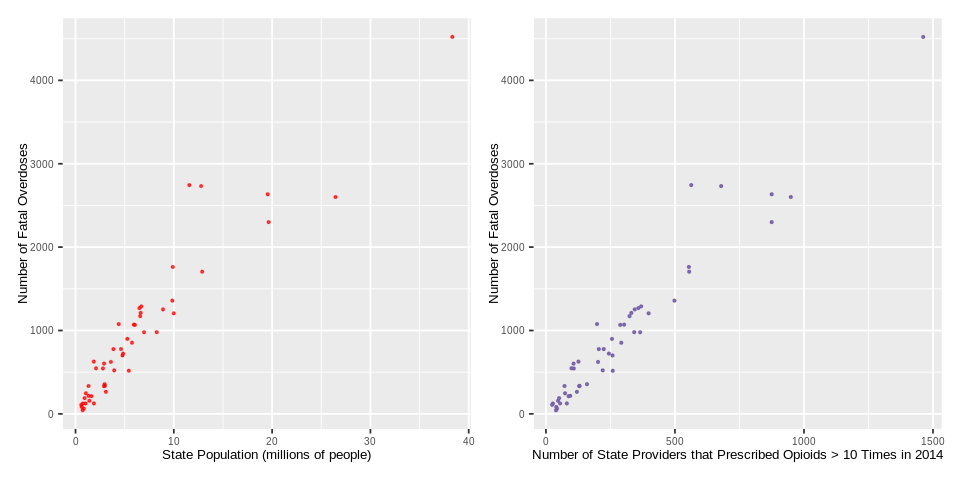

In [41]:
options(repr.plot.width = 8, repr.plot.height = 4)

p + q

### Note how these plots are strikingly similar. 

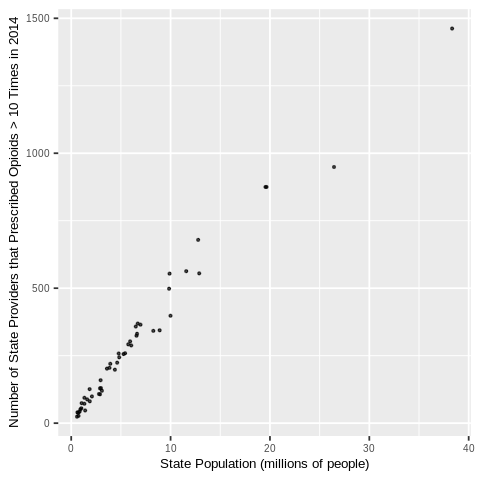

In [143]:
options(repr.plot.width = 4, repr.plot.height = 4)

pq_plot = ggplot(incidence, aes(x = (Population/1000000), y = PrescriptionCount)) + geom_point(size = 0.5, alpha = 0.7)

pq_plot = pq_plot + theme(axis.text.x = element_text(size = 6),
                          axis.text.y = element_text(size = 6),
                          strip.text.x = element_blank(),
                          axis.title.x = element_text(size = 8),
                          axis.title.y = element_text(size = 8),
                          strip.background = element_blank())

pq_plot = pq_plot + labs(y = "Number of State Providers that Prescribed Opioids > 10 Times in 2014",
             x = "State Population (millions of people)")

pq_plot

### This gives us additional confirmation that an increase in state population correlates with an increase in number of providers who prescribe high amounts of opioids. Once again, it is intuitive that a larger state population would have a higher number of state providers that prescribe a high amount in a year (in this case, our threshold is exceeding 10 opioid prescriptions). 

### However, perhaps some states have higher rates of overdoses but they are smaller in overall population size. Let's define incidence of overdoses by taking the number of deaths divided by the state population to see if certain states have a higher incidence regardless of population size.  We also do the same for incidence of high prescriptions, defined as number of state providers that exceed 10 prescriptions a year divided by the state population.

In [134]:
deathincidence = df %>%
    mutate(IncidentDeaths = Deaths/(Population/1000000)) %>%
    arrange(desc(IncidentDeaths)) 

deathincidence %>% head(n = 10)

Abbrev,State,Population,Deaths,PrescriptionCount,IncidentDeaths
<chr>,<chr>,<dbl>,<dbl>,<int>,<dbl>
WV,West Virginia,1854304,627,126,338.1323
NM,New Mexico,2085287,547,99,262.3140
NH,New Hampshire,1323459,334,72,252.3690
KY,Kentucky,4395295,1077,198,245.0347
OH,Ohio,11570808,2744,563,237.1485
RI,Rhode Island,1051511,247,74,234.9001
PA,Pennsylvania,12773801,2732,679,213.8753
UT,Utah,2900872,603,107,207.8685
DE,Delaware,925749,189,51,204.1590


In [135]:
prescriptionincidence = df %>%
    mutate(PrescriptionIncidence = PrescriptionCount/(Population/1000000)) %>%
    arrange(desc(PrescriptionIncidence))

prescriptionincidence %>% head(n = 10)

Abbrev,State,Population,Deaths,PrescriptionCount,PrescriptionIncidence
<chr>,<chr>,<dbl>,<dbl>,<int>,<dbl>
ME,Maine,1328302,216,94,70.76704
RI,Rhode Island,1051511,247,74,70.37492
WV,West Virginia,1854304,627,126,67.95002
VT,Vermont,626630,83,40,63.83352
CT,Connecticut,3596080,623,202,56.17228
MI,Michigan,9895622,1762,554,55.98435
OR,Oregon,3930065,522,220,55.97872
MA,Massachusetts,6692824,1289,369,55.13368
TN,Tennessee,6495978,1269,358,55.11102


### If you observe the states with the ten highest incidences of fatal overdoses, many of them are not the top ten most populated states. Further inspection reveals that many of these states are highly rural states that are east of the Mississippi River. Incidence of high prescriptions also appears to be most severe in states east of the river.  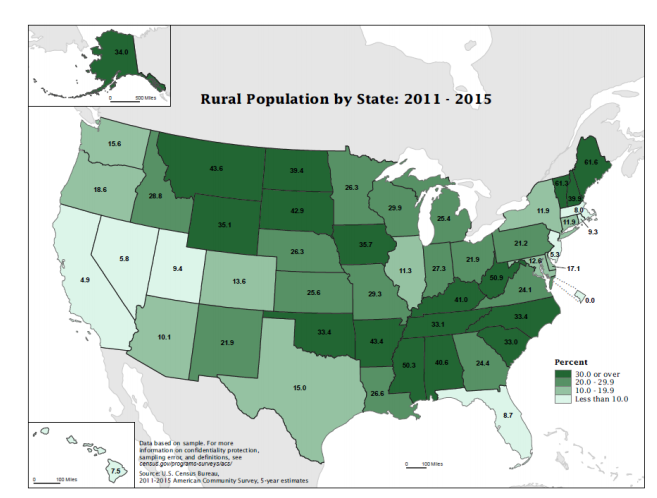

### For information that is outside the scope of the dataset but is important for contextualizion, states east of the Mississippi River struggle with white powder heroin use (whereas Western states are more likely to use Mexican black tar heroin). An increase in fentanyl, a powerful synthetic opioid that has a white and powdery consistency, is often used to lace white powder heroin with no distinguishability to the consumer. However, fentanyl is so potent that its margin of error when creating these mixtures is incredibly small, meaning that many users will unintentionally overdose. 

In [81]:
#Assign states by region, which we will add into our dataframe in a new column

West <- matrix(c("AK", "CA", "CO", "HI", "ID", "MT", "NV", "OR", "UT", "WA", "WY"), ncol = 1)
West1 <- matrix(rep(c("West"), times = 11), ncol = 1)

newW = cbind(West, West1)

Mid <- matrix(c("IL", "IN", "IA", "KS", "MI", "MO", "MN", "NE", "ND", "NH", "SD", "WI"), ncol = 1)
Mid1 <- matrix(rep(c("Midwest"), times = 12), ncol = 1)

newMid = cbind(Mid, Mid1)

SW <- matrix(c("AZ", "NM", "OK", "TX"), ncol = 1)
SW1 <- matrix(rep(c("Southwest"), times = 4), ncol = 1)

newSW = cbind(SW, SW1)

SE <- matrix(c("AR", "AL", "DE", "NC", "SC", "FL", "LA", "MD", "GA", "MS", "VA", "WV", "KY", "TN"), ncol = 1)
SE1 <- matrix(rep(c("Southeast"), times = 14), ncol = 1)

newSE = cbind(SE, SE1) 

NE <- matrix(c("CT", "MA", "ME", "NH", "NJ", "NY", "PA", "RI", "VT"), ncol = 1)
NE1 <- matrix(rep(c("Northeast"), times = 9), ncol = 1)

newNE = cbind(NE, NE1)

In [138]:
region_table = rbind(newW, newMid, newSW, newSE, newNE)

In [140]:
region_df = as.data.frame(region_table)

region_df1 = region_df %>% 
    rename(Abbrev = V1, Region = V2)

In [84]:
dfplusregion = inner_join(x = df, y = region_df1, by = "Abbrev", all = TRUE)

dfplusregion %>% head

Abbrev,State,Population,Deaths,PrescriptionCount,Region
<chr>,<chr>,<dbl>,<dbl>,<int>,<chr>
AK,Alaska,735132,124,27,West
AL,Alabama,4833722,723,244,Southeast
AR,Arkansas,2959373,356,159,Southeast
AZ,Arizona,6626624,1211,331,Southwest
CA,California,38332521,4521,1462,West
CO,Colorado,5268367,899,256,West


In [136]:
incidence = df %>% 
    mutate(IncidentDeaths = Deaths/(Population/1000000)) %>%
    mutate(PrescriptionIncidence = PrescriptionCount/(Population/1000000))

In [137]:
final_df = inner_join(x = dfplusregion, y = incidence, by = "State", all = TRUE)

final_df %>% head

Abbrev.x,State,Population.x,Deaths.x,PrescriptionCount.x,Region,Abbrev.y,Population.y,Deaths.y,PrescriptionCount.y,IncidentDeaths,PrescriptionIncidence
<chr>,<chr>,<dbl>,<dbl>,<int>,<chr>,<chr>,<dbl>,<dbl>,<int>,<dbl>,<dbl>
AK,Alaska,735132,124,27,West,AK,735132,124,27,168.6772,36.72810
AL,Alabama,4833722,723,244,Southeast,AL,4833722,723,244,149.5742,50.47870
AR,Arkansas,2959373,356,159,Southeast,AR,2959373,356,159,120.2958,53.72760
AZ,Arizona,6626624,1211,331,Southwest,AZ,6626624,1211,331,182.7477,49.95002
CA,California,38332521,4521,1462,West,CA,38332521,4521,1462,117.9416,38.13994
CO,Colorado,5268367,899,256,West,CO,5268367,899,256,170.6411,48.59191


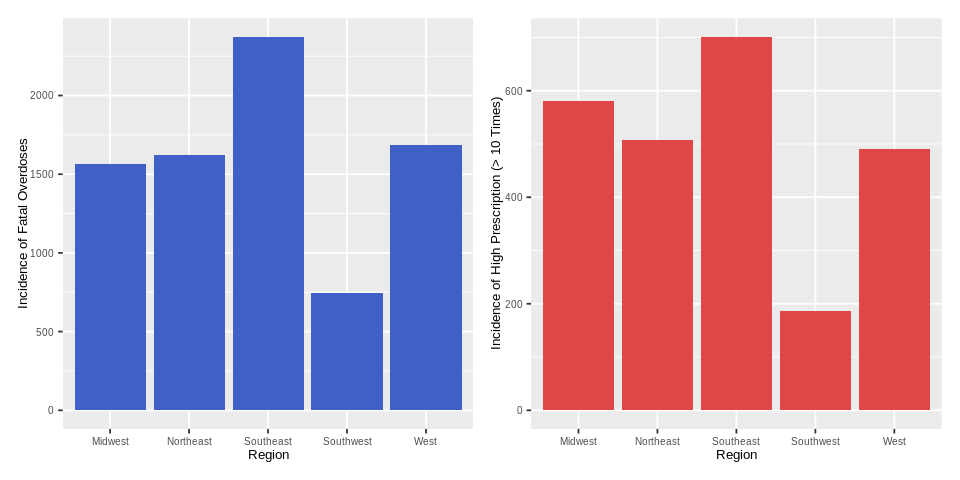

In [142]:
options(repr.plot.height = 4, repr.plot.width = 8)

p = ggplot(final_df, aes(x = Region, y = IncidentDeaths)) + geom_col(fill = "#4060C7")

p = p + theme(axis.text.x = element_text(size = 6),
              axis.text.y = element_text(size = 6),
              strip.text.x = element_blank(),
              axis.title.x = element_text(size = 8),
              axis.title.y = element_text(size = 8),
              strip.background = element_blank())

p = p + labs(y = "Incidence of Fatal Overdoses",
             x = "Region")

q = ggplot(final_df, aes(x = Region, y = PrescriptionIncidence)) + geom_col(fill = "#DF4747")

q = q + theme(axis.text.x = element_text(size = 6),
              axis.text.y = element_text(size = 6),
              strip.text.x = element_blank(),
              axis.title.x = element_text(size = 8),
              axis.title.y = element_text(size = 8),
              strip.background = element_blank())

q = q + labs(y = "Incidence of High Prescription (> 10 Times)",
             x = "Region")

p + q

### Based on these results, we see that the opioid crisis is particularly burdensome in states in the Northeast, Southeast, and Midwest regions of the US, and this is likely due to two reasons: 1) increased illegal fentanyl trafficking has led to more overdoses in the states where white powder heroin tends to be a major problem, and 2) high opioid prescribing practices, which has been linked to occupational injury and rurality.